# **Libraries**
---

In [2]:
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm as tq
import gzip, pickle



# **Load files**  ▓▓▓▓▓▓▓▓░░░░░░░░░░░░  100%
---



# **25M data file**

In [3]:
df_25M = pd.read_csv("ratings.csv").drop(columns='timestamp').to_numpy()
movies_df_25M = pd.read_csv("movies.csv").to_numpy()

In [3]:
movies_df_25M

array([[1, 'Toy Story (1995)',
        'Adventure|Animation|Children|Comedy|Fantasy'],
       [2, 'Jumanji (1995)', 'Adventure|Children|Fantasy'],
       [3, 'Grumpier Old Men (1995)', 'Comedy|Romance'],
       ...,
       [209163, 'Bad Poems (2018)', 'Comedy|Drama'],
       [209169, 'A Girl Thing (2001)', '(no genres listed)'],
       [209171, "Women of Devil's Island (1962)",
        'Action|Adventure|Drama']], dtype=object)

# **100K Df**

In [4]:
#100k data file
path = "/home/oepeng/Documents/Python/my jupter/100k_csv/"
ratings_df = pd.read_csv( path + "ratings.csv").drop(columns='timestamp').to_numpy()
movies_df = pd.read_csv( path + "movies.csv").to_numpy()

dummy_user = {
    'userId' : 999, #.
    'movieId': 2640,  # superman
    'rating': 5 
}


In [4]:
from datastructures import Sparser 
sparse = Sparser(df_25M, movies_df_25M)

# **Plots of data**

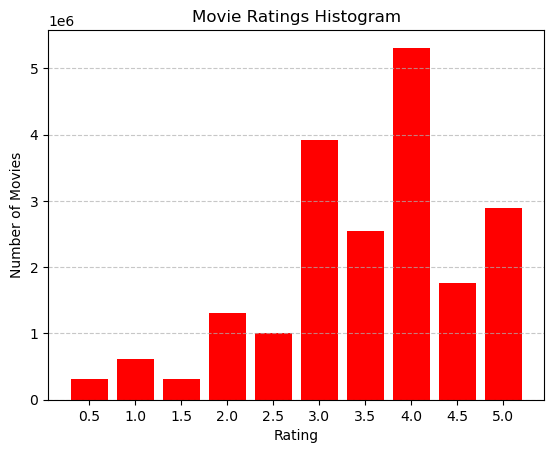

In [5]:
sparse.plot_ratings()

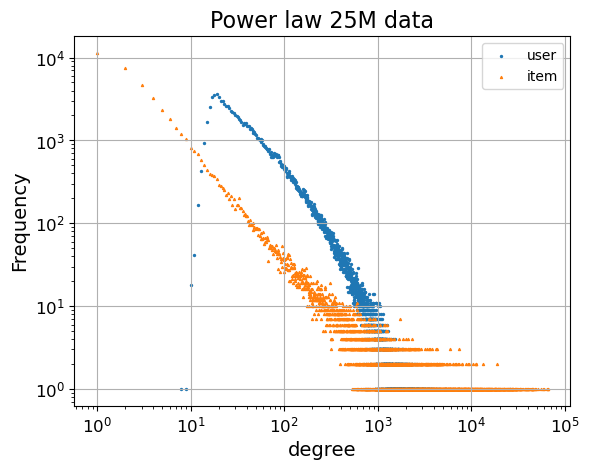

In [23]:
sparse.plot_scatter()


# ```Create sparse matrices```


In [26]:
# data files

train_test_data = sparse.data_by_user_train, sparse.data_by_movie_train, sparse.data_by_user_test 
features_data = sparse.movie_to_system_mov_title_dict, sparse.item_to_features, sparse.features_to_item, sparse.genres

In [27]:
features_data[3]

array(['(no genres listed)', 'Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'], dtype='<U18')

In [7]:
maps = sparse.system_user_to_user_dict, sparse.user_to_system_user

In [10]:
maps[0][23]


24054

In [28]:
 #pickle and load
sparse_data = {'features_data':features_data , 'train_test_data': train_test_data}

with open( "25M_data_normal.pkl", "wb") as f:
    pickle.dump(sparse_data , f)



In [29]:
# load
with open("25M_data_normal.pkl", "rb") as f:
    loaded_sparse_data = pickle.load(f)

features_data = loaded_sparse_data["features_data"]
train_test_data = loaded_sparse_data["train_test_data"]
movie_to_system_mov_title_dict = features_data[0]


  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [03:46<34:02, 226.92s/it]

epoch: 1   rmse train: 1.101921803624593  | rmse test: 1.136399740065903


 20%|██        | 2/10 [07:33<30:15, 226.97s/it]

epoch: 2   rmse train: 0.9074086021075621  | rmse test: 0.9282505672403023


 30%|███       | 3/10 [11:23<26:35, 227.93s/it]

epoch: 3   rmse train: 0.8612765992230478  | rmse test: 0.8823934634602372


 40%|████      | 4/10 [15:05<22:35, 225.92s/it]

epoch: 4   rmse train: 0.8482296881798328  | rmse test: 0.8695291711864426


 50%|█████     | 5/10 [18:49<18:45, 225.09s/it]

epoch: 5   rmse train: 0.8405116306637949  | rmse test: 0.8618130945239313


 60%|██████    | 6/10 [22:24<14:47, 221.80s/it]

epoch: 6   rmse train: 0.8347388079394509  | rmse test: 0.8560900550797574


 70%|███████   | 7/10 [26:01<11:00, 220.12s/it]

epoch: 7   rmse train: 0.8295364636341148  | rmse test: 0.8509780516374394


 80%|████████  | 8/10 [29:39<07:19, 219.53s/it]

epoch: 8   rmse train: 0.8246714849270645  | rmse test: 0.8462018772805479


 90%|█████████ | 9/10 [33:16<03:38, 218.59s/it]

epoch: 9   rmse train: 0.8202936368860613  | rmse test: 0.8419831391548128


100%|██████████| 10/10 [36:54<00:00, 221.46s/it]

epoch: 10   rmse train: 0.8170494493394617  | rmse test: 0.8389386154664006


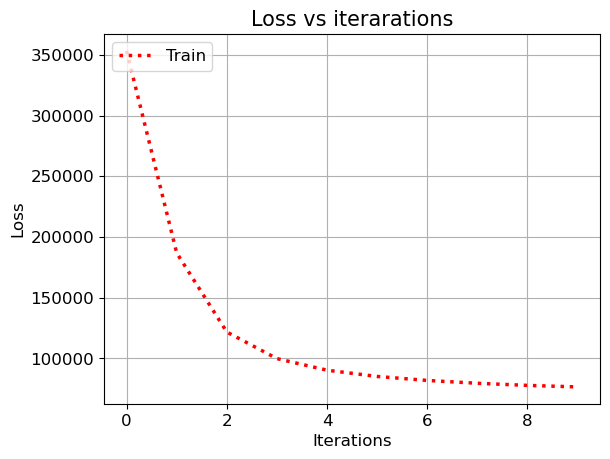

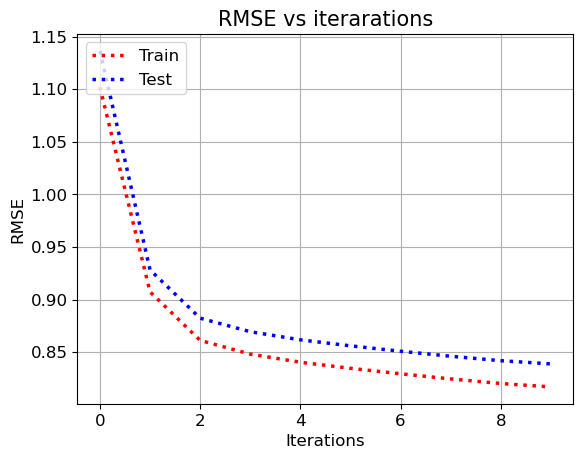

In [8]:
# train the model

from model import Trainor
trainor = Trainor(data = train_test_data, latent_d=2, lamda= 0.01, tau=0.01, gamma=1)
trainor.train() 

In [24]:
 #pickle and load
data_trained_data = trainor.user_matrix , trainor.item_matrix ,trainor.user_bias ,trainor.item_bias 
with open( "25M_data_trained_data.pkl", "wb") as f:
    pickle.dump(data_trained_data , f)



In [13]:
# load
with open("25M_data_trained_data.pkl", "rb") as f:
    loaded_data_trained_data = pickle.load(f)

# ```evalute performance of model```

In [ ]:

def train_and_plot_rmse_vs_latent_d(data, max_latent_d=20, show_plot=True):
    rmse_train_list = []
    rmse_test_list = []
    latent_d_values = [] 
    percentage_diff = [] # x-axis values
    
    for latent_d in range(1 , max_latent_d + 1):
        if latent_d <= 10 or latent_d % 2 == 0:
            print("Training with latent_d =", latent_d )
            model = Trainor(data, latent_d=latent_d)
            model.train(epoch=10, showplt = False)
            r = model.rmse[-1]  # Get the last RMSE from the training
            rt = model.rmse_test[-1]
            var =  100*(rt - r)/r
            percentage_diff.append(var)
            rmse_train_list.append(r) 
            rmse_test_list.append(rt)  
            latent_d_values.append(latent_d)  
    
    # Plots 
    plt.figure(figsize=(10, 6))
    plt.plot(latent_d_values, rmse_train_list, label='RMSE Train', marker='o')
    plt.plot(latent_d_values, rmse_test_list, label='RMSE Test', marker='o')
    plt.xlabel('Latent Dimensions k ')
    plt.ylabel('RMSE')
    plt.title('RMSEs vs. Latent Dimension')
    plt.legend()
    plt.grid()
    
  
    plt.savefig('rmse_vs_latent_d.svg')
    plt.show()
    
    plt.plot(latent_d_values, percentage_diff, marker='o')
    plt.xlabel('Latent Dimensions k ')
    plt.ylabel('difference in RMSE')
    plt.title('varince of RMSEs vs. Latent Dimension')
    plt.grid()
    plt.savefig('latent dimesions k.svg')
    plt.show()


train_and_plot_rmse_vs_latent_d(train_test_data,max_latent_d=20, show_plot=False)  



# **Grid search**

In [ ]:
def grid_search(data, lambda_values, gamma_values, tau_values):
    best_params = 0
    best_rmse = 10000000

    for lam in lambda_values:
        for g in gamma_values:
            for t in tau_values:
                trainor = Trainor(data, lamda=lam, gamma=g, tau=t)
                trainor.train(showplt=False)
                test_loss, test_rmse = trainor.compute_cost(trainor.test_data)

                if test_rmse < best_rmse:
                    best_rmse = test_rmse
                    best_params = (lambda_, gamma, beta)

    return best_params, best_rmse



lambda_values = [0.001, 0.01, 0.1]
gamma_values = [0.001, 0.01, 0.1]
beta_values = [0.01, 0.1, 1.0]

best_params, best_rmse = grid_search(train_test_data, lambda_values, gamma_values, beta_values)


In [19]:
best_params

(0.01, 0.01, 1.0)

# **Predictor_Predictions**

In [53]:
trainor.predictor(features_data[0], train_test_data[0] , user_indx = 24054, dummy = True, weight = 1)

AI recommnds:........ 
	 1 Sting, The (1973)
	 2 Vrijdag
	 3 Dark Knight, The (2008)
	 4 Princess Bride, The (1987)
	 5 Lord of the Rings: The Return of the King, The (2003)
	 6 Lord of the Rings: The Fellowship of the Ring, The (2001)
	 7 Lord of the Rings: The Two Towers, The (2002)
	 8 Inception (2010)
	 9 Lethal Weapon (1987)
	 10 Pirates of the Caribbean: The Curse of the Black Pearl (2003)


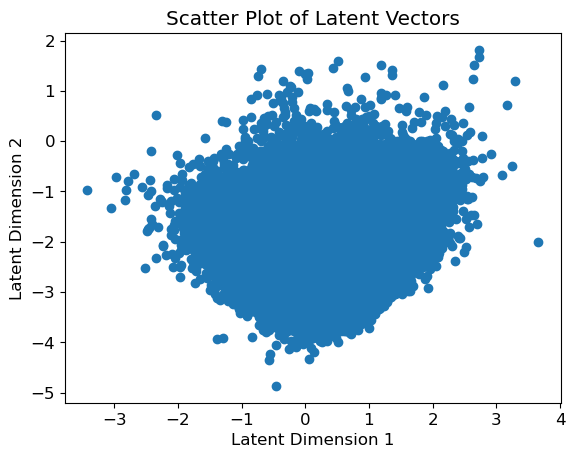

In [54]:

# Create a scatter plot
latent_vectors = trainor.user_matrix  


plt.scatter(latent_vectors[:, 0], latent_vectors[:, 1])
plt.title("Scatter Plot of Latent Vectors")
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.show()

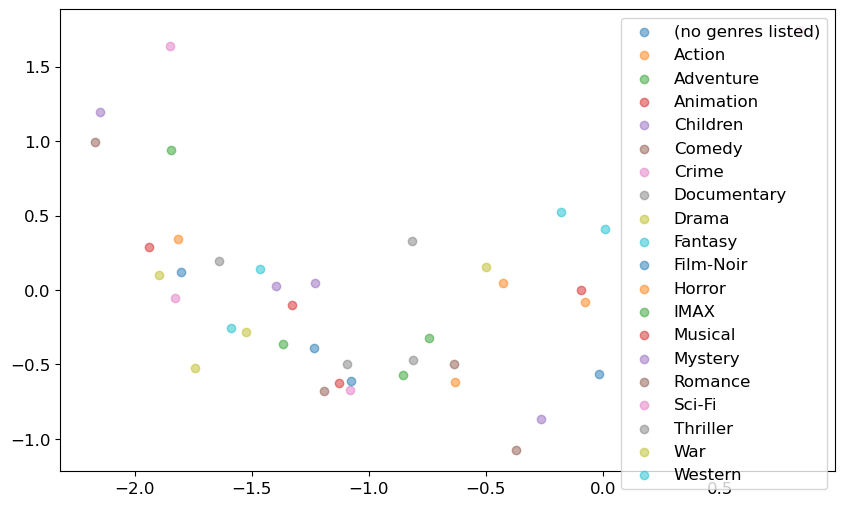

In [45]:


fig, ax = plt.subplots(figsize=(10, 6))
for feature_index, mids in enumerate(features_data[2]):
    if len(mids) >= 3:
        random_movies = np.random.choice(mids, 2, replace=False).tolist()
        for movie in random_movies:
            plt.scatter(data_trained_data[1][movie, 0], data_trained_data[1][movie, 1], alpha=0.5)

plt.autoscale()
plt.legend(features_data[3], loc="upper right")

plt.savefig("ebeddings.svg")


plt.show()
